In [10]:
# prompt: import libraries for association rules

!pip install mlxtend --upgrade

import pandas as pd
from mlxtend.frequent_patterns import apriori
#from mlxtend.frequent_patterns import association_rules


In [22]:
# prompt: read the file /content/Online retail.xlsx

df = pd.read_excel('/content/Online retail.xlsx')


In [27]:
# prompt: upload a  sample data set of transactions

# Sample transaction data (replace with your own data)
data = {'TransactionID': [1, 1, 1, 2, 2, 3, 3, 3, 4, 4, 4, 4],
        'Item': ['Milk', 'Bread', 'Eggs', 'Milk', 'Diapers', 'Bread', 'Milk', 'Diapers', 'Milk', 'Bread', 'Eggs', 'Diapers']}
df_transactions = pd.DataFrame(data)
print(df_transactions)

# Convert the data into a one-hot encoded format for Apriori
basket = (df_transactions.groupby(['TransactionID', 'Item'])['Item']
          .count().unstack().reset_index().fillna(0)
          .set_index('TransactionID'))

# Convert values to 1 or 0 (if the item is present in the transaction)
def encode_units(x):
    if x <= 0:
        return 0
    if x >= 1:
        return 1

basket_sets = basket.applymap(encode_units)

# Now you can apply Apriori to find frequent itemsets
frequent_itemsets = apriori(basket_sets, min_support=0.5, use_colnames=True)

# You can also generate association rules if you want
# rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)

frequent_itemsets
#print(rules)



    TransactionID     Item
0               1     Milk
1               1    Bread
2               1     Eggs
3               2     Milk
4               2  Diapers
5               3    Bread
6               3     Milk
7               3  Diapers
8               4     Milk
9               4    Bread
10              4     Eggs
11              4  Diapers


<ipython-input-27-911edf2febd2>:21: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  basket_sets = basket.applymap(encode_units)
/usr/local/lib/python3.11/dist-packages/mlxtend/frequent_patterns/fpcommon.py:161: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


support                itemsets
0      0.75                 (Bread)
1      0.75               (Diapers)
2      0.50                  (Eggs)
3      1.00                  (Milk)
4      0.50        (Bread, Diapers)
5      0.50           (Eggs, Bread)
6      0.75           (Milk, Bread)
7      0.75         (Milk, Diapers)
8      0.50            (Milk, Eggs)
9      0.50  (Milk, Bread, Diapers)
10     0.50     (Milk, Eggs, Bread)

In [29]:
# prompt: apply a association rules on data set

from mlxtend.frequent_patterns import association_rules

# Assuming you have already calculated frequent_itemsets as shown in the previous code

rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)

rules


/usr/local/lib/python3.11/dist-packages/mlxtend/frequent_patterns/association_rules.py:186: RuntimeWarning: invalid value encountered in divide
  cert_metric = np.where(certainty_denom == 0, 0, certainty_num / certainty_denom)


antecedents       consequents  antecedent support  \
0             (Eggs)           (Bread)                0.50   
1            (Bread)            (Eggs)                0.75   
2             (Milk)           (Bread)                1.00   
3            (Bread)            (Milk)                0.75   
4             (Milk)         (Diapers)                1.00   
5          (Diapers)            (Milk)                0.75   
6             (Milk)            (Eggs)                1.00   
7             (Eggs)            (Milk)                0.50   
8   (Bread, Diapers)            (Milk)                0.50   
9             (Milk)  (Bread, Diapers)                1.00   
10      (Milk, Eggs)           (Bread)                0.50   
11     (Milk, Bread)            (Eggs)                0.75   
12     (Eggs, Bread)            (Milk)                0.50   
13            (Milk)     (Eggs, Bread)                1.00   
14            (Eggs)     (Milk, Bread)                0.50   
15           (Bread)      (Milk, Eggs)                0.75   

    consequent support  support  confidence      lift  representativity  \
0                 0.75     0.50    1.000000  1.333333               1.0   
1                 0.50     0.50    0.666667  1.333333               1.0   
2                 0.75     0.75    0.750000  1.000000               1.0   
3                 1.00     0.75    1.000000  1.000000               1.0   
4                 0.75     0.75    0.750000  1.000000               1.0   
5                 1.00     0.75    1.000000  1.000000               1.0   
6                 0.50     0.50    0.500000  1.000000               1.0   
7                 1.00     0.50    1.000000  1.000000               1.0   
8                 1.00     0.50    1.000000  1.000000               1.0   
9                 0.50     0.50    0.500000  1.000000               1.0   
10                0.75     0.50    1.000000  1.333333               1.0   
11                0.50     0.50    0.666667  1.333333               1.0   
12                1.00     0.50    1.000000  1.000000               1.0   
13                0.50     0.50    0.500000  1.000000               1.0   
14                0.75     0.50    1.000000  1.333333               1.0   
15                0.50     0.50    0.666667  1.333333               1.0   

    leverage  conviction  zhangs_metric   jaccard  certainty  kulczynski  
0      0.125         inf            0.5  0.666667   1.000000    0.833333  
1      0.125         1.5            1.0  0.666667   0.333333    0.833333  
2      0.000         1.0            0.0  0.750000   0.000000    0.875000  
3      0.000         inf            0.0  0.750000   0.000000    0.875000  
4      0.000         1.0            0.0  0.750000   0.000000    0.875000  
5      0.000         inf            0.0  0.750000   0.000000    0.875000  
6      0.000         1.0            0.0  0.500000   0.000000    0.750000  
7      0.000         inf            0.0  0.500000   0.000000    0.750000  
8      0.000         inf            0.0  0.500000   0.000000    0.750000  
9      0.000         1.0            0.0  0.500000   0.000000    0.750000  
10     0.125         inf            0.5  0.666667   1.000000    0.833333  
11     0.125         1.5            1.0  0.666667   0.333333    0.833333  
12     0.000         inf            0.0  0.500000   0.000000    0.750000  
13     0.000         1.0            0.0  0.500000   0.000000    0.750000  
14     0.125         inf            0.5  0.666667   1.000000    0.833333  
15     0.125         1.5            1.0  0.666667   0.333333    0.833333

In [31]:
# prompt: using association rule of mining techniques find out the relation between product purchased together

# Assuming you have already calculated frequent_itemsets as shown in the previous code

rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)

rules


/usr/local/lib/python3.11/dist-packages/mlxtend/frequent_patterns/association_rules.py:186: RuntimeWarning: invalid value encountered in divide
  cert_metric = np.where(certainty_denom == 0, 0, certainty_num / certainty_denom)


antecedents       consequents  antecedent support  \
0             (Eggs)           (Bread)                0.50   
1            (Bread)            (Eggs)                0.75   
2             (Milk)           (Bread)                1.00   
3            (Bread)            (Milk)                0.75   
4             (Milk)         (Diapers)                1.00   
5          (Diapers)            (Milk)                0.75   
6             (Milk)            (Eggs)                1.00   
7             (Eggs)            (Milk)                0.50   
8   (Bread, Diapers)            (Milk)                0.50   
9             (Milk)  (Bread, Diapers)                1.00   
10      (Milk, Eggs)           (Bread)                0.50   
11     (Milk, Bread)            (Eggs)                0.75   
12     (Eggs, Bread)            (Milk)                0.50   
13            (Milk)     (Eggs, Bread)                1.00   
14            (Eggs)     (Milk, Bread)                0.50   
15           (Bread)      (Milk, Eggs)                0.75   

    consequent support  support  confidence      lift  representativity  \
0                 0.75     0.50    1.000000  1.333333               1.0   
1                 0.50     0.50    0.666667  1.333333               1.0   
2                 0.75     0.75    0.750000  1.000000               1.0   
3                 1.00     0.75    1.000000  1.000000               1.0   
4                 0.75     0.75    0.750000  1.000000               1.0   
5                 1.00     0.75    1.000000  1.000000               1.0   
6                 0.50     0.50    0.500000  1.000000               1.0   
7                 1.00     0.50    1.000000  1.000000               1.0   
8                 1.00     0.50    1.000000  1.000000               1.0   
9                 0.50     0.50    0.500000  1.000000               1.0   
10                0.75     0.50    1.000000  1.333333               1.0   
11                0.50     0.50    0.666667  1.333333               1.0   
12                1.00     0.50    1.000000  1.000000               1.0   
13                0.50     0.50    0.500000  1.000000               1.0   
14                0.75     0.50    1.000000  1.333333               1.0   
15                0.50     0.50    0.666667  1.333333               1.0   

    leverage  conviction  zhangs_metric   jaccard  certainty  kulczynski  
0      0.125         inf            0.5  0.666667   1.000000    0.833333  
1      0.125         1.5            1.0  0.666667   0.333333    0.833333  
2      0.000         1.0            0.0  0.750000   0.000000    0.875000  
3      0.000         inf            0.0  0.750000   0.000000    0.875000  
4      0.000         1.0            0.0  0.750000   0.000000    0.875000  
5      0.000         inf            0.0  0.750000   0.000000    0.875000  
6      0.000         1.0            0.0  0.500000   0.000000    0.750000  
7      0.000         inf            0.0  0.500000   0.000000    0.750000  
8      0.000         inf            0.0  0.500000   0.000000    0.750000  
9      0.000         1.0            0.0  0.500000   0.000000    0.750000  
10     0.125         inf            0.5  0.666667   1.000000    0.833333  
11     0.125         1.5            1.0  0.666667   0.333333    0.833333  
12     0.000         inf            0.0  0.500000   0.000000    0.750000  
13     0.000         1.0            0.0  0.500000   0.000000    0.750000  
14     0.125         inf            0.5  0.666667   1.000000    0.833333  
15     0.125         1.5            1.0  0.666667   0.333333    0.833333

In [34]:
# prompt: apply Apriori  alogrithm and threshold

import pandas as pd
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

# Assuming you have already calculated frequent_itemsets as shown in the previous code

# Apply Apriori with a minimum support threshold of 0.2
frequent_itemsets = apriori(basket_sets, min_support=0.2, use_colnames=True)

# Generate association rules with a minimum lift threshold of 1
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)

# Print the rules
rules


/usr/local/lib/python3.11/dist-packages/mlxtend/frequent_patterns/fpcommon.py:161: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/mlxtend/frequent_patterns/association_rules.py:186: RuntimeWarning: invalid value encountered in divide
  cert_metric = np.where(certainty_denom == 0, 0, certainty_num / certainty_denom)


antecedents             consequents  antecedent support  \
0                   (Eggs)                 (Bread)                0.50   
1                  (Bread)                  (Eggs)                0.75   
2                   (Milk)                 (Bread)                1.00   
3                  (Bread)                  (Milk)                0.75   
4                   (Milk)               (Diapers)                1.00   
5                (Diapers)                  (Milk)                0.75   
6                   (Milk)                  (Eggs)                1.00   
7                   (Eggs)                  (Milk)                0.50   
8          (Eggs, Diapers)                 (Bread)                0.25   
9         (Bread, Diapers)                  (Eggs)                0.50   
10                  (Eggs)        (Bread, Diapers)                0.50   
11                 (Bread)         (Eggs, Diapers)                0.75   
12        (Bread, Diapers)                  (Milk)                0.50   
13                  (Milk)        (Bread, Diapers)                1.00   
14            (Milk, Eggs)                 (Bread)                0.50   
15           (Milk, Bread)                  (Eggs)                0.75   
16           (Eggs, Bread)                  (Milk)                0.50   
17                  (Milk)           (Eggs, Bread)                1.00   
18                  (Eggs)           (Milk, Bread)                0.50   
19                 (Bread)            (Milk, Eggs)                0.75   
20         (Eggs, Diapers)                  (Milk)                0.25   
21                  (Milk)         (Eggs, Diapers)                1.00   
22   (Milk, Eggs, Diapers)                 (Bread)                0.25   
23  (Milk, Bread, Diapers)                  (Eggs)                0.50   
24  (Eggs, Bread, Diapers)                  (Milk)                0.25   
25            (Milk, Eggs)        (Bread, Diapers)                0.50   
26           (Milk, Bread)         (Eggs, Diapers)                0.75   
27         (Eggs, Diapers)           (Milk, Bread)                0.25   
28        (Bread, Diapers)            (Milk, Eggs)                0.50   
29                  (Milk)  (Eggs, Bread, Diapers)                1.00   
30                  (Eggs)  (Milk, Bread, Diapers)                0.50   
31                 (Bread)   (Milk, Eggs, Diapers)                0.75   

    consequent support  support  confidence      lift  representativity  \
0                 0.75     0.50    1.000000  1.333333               1.0   
1                 0.50     0.50    0.666667  1.333333               1.0   
2                 0.75     0.75    0.750000  1.000000               1.0   
3                 1.00     0.75    1.000000  1.000000               1.0   
4                 0.75     0.75    0.750000  1.000000               1.0   
5                 1.00     0.75    1.000000  1.000000               1.0   
6                 0.50     0.50    0.500000  1.000000               1.0   
7                 1.00     0.50    1.000000  1.000000               1.0   
8                 0.75     0.25    1.000000  1.333333               1.0   
9                 0.50     0.25    0.500000  1.000000               1.0   
10                0.50     0.25    0.500000  1.000000               1.0   
11                0.25     0.25    0.333333  1.333333               1.0   
12                1.00     0.50    1.000000  1.000000               1.0   
13                0.50     0.50    0.500000  1.000000               1.0   
14                0.75     0.50    1.000000  1.333333               1.0   
15                0.50     0.50    0.666667  1.333333               1.0   
16                1.00     0.50    1.000000  1.000000               1.0   
17                0.50     0.50    0.500000  1.000000               1.0   
18                0.75     0.50    1.000000  1.333333               1.0   
19                0.50     0.50    0.666667  1.333333               1.0 

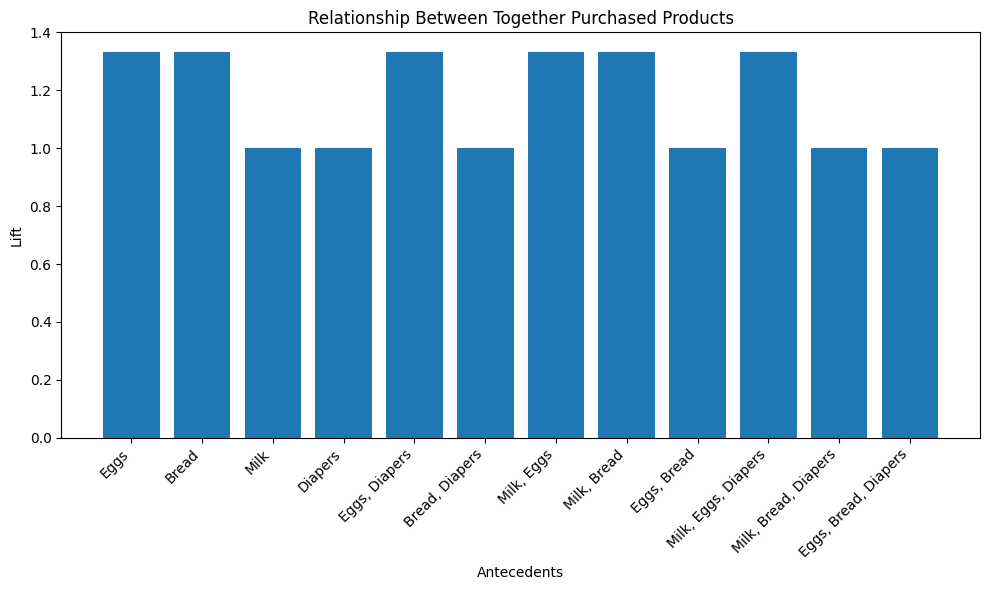

In [38]:
# prompt: visualize the barchat relation between together purchased products

import matplotlib.pyplot as plt
import pandas as pd

# Assuming you have already calculated 'rules' as shown in the previous code

# Create a new DataFrame with the antecedent and consequent items
antecedent_consequent = rules[['antecedents', 'consequents']].copy()

# Convert the frozenset to a string for plotting
antecedent_consequent['antecedents'] = antecedent_consequent['antecedents'].apply(lambda x: ', '.join(list(x)))
antecedent_consequent['consequents'] = antecedent_consequent['consequents'].apply(lambda x: ', '.join(list(x)))

# Create a bar chart showing the relation between antecedent and consequent
plt.figure(figsize=(10, 6))
plt.bar(antecedent_consequent['antecedents'], rules['lift'])
plt.xlabel('Antecedents')
plt.ylabel('Lift')
plt.title('Relationship Between Together Purchased Products')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


              antecedents      consequents      lift  confidence
0                  (Eggs)          (Bread)  1.333333    1.000000
1                 (Bread)           (Eggs)  1.333333    0.666667
11                (Bread)  (Eggs, Diapers)  1.333333    0.333333
8         (Eggs, Diapers)          (Bread)  1.333333    1.000000
15          (Milk, Bread)           (Eggs)  1.333333    0.666667
14           (Milk, Eggs)          (Bread)  1.333333    1.000000
18                 (Eggs)    (Milk, Bread)  1.333333    1.000000
19                (Bread)     (Milk, Eggs)  1.333333    0.666667
27        (Eggs, Diapers)    (Milk, Bread)  1.333333    1.000000
22  (Milk, Eggs, Diapers)          (Bread)  1.333333    1.000000


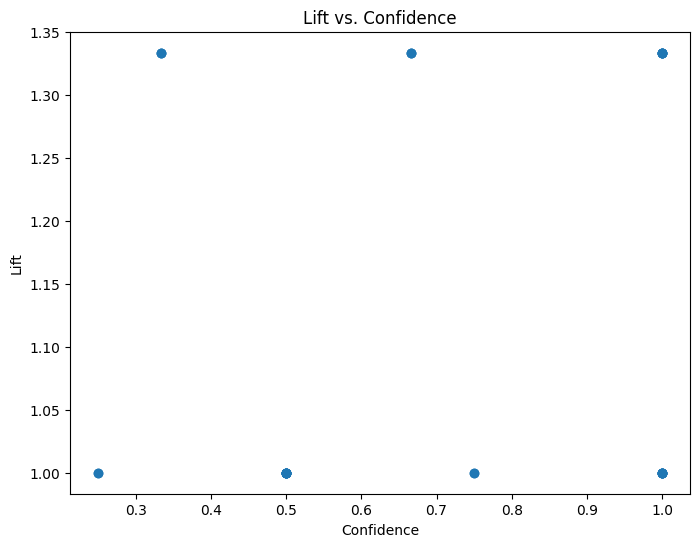


Rules with lift above threshold:
              antecedents            consequents      lift  confidence
0                  (Eggs)                (Bread)  1.333333    1.000000
1                 (Bread)                 (Eggs)  1.333333    0.666667
8         (Eggs, Diapers)                (Bread)  1.333333    1.000000
11                (Bread)        (Eggs, Diapers)  1.333333    0.333333
14           (Milk, Eggs)                (Bread)  1.333333    1.000000
15          (Milk, Bread)                 (Eggs)  1.333333    0.666667
18                 (Eggs)          (Milk, Bread)  1.333333    1.000000
19                (Bread)           (Milk, Eggs)  1.333333    0.666667
22  (Milk, Eggs, Diapers)                (Bread)  1.333333    1.000000
26          (Milk, Bread)        (Eggs, Diapers)  1.333333    0.333333
27        (Eggs, Diapers)          (Milk, Bread)  1.333333    1.000000
31                (Bread)  (Milk, Eggs, Diapers)  1.333333    0.333333


In [40]:
# prompt:  use lift appropriate threshold

# Assuming you have already calculated 'rules' as shown in the previous code

# Find the rules with the highest lift values
# You can adjust the number of top rules to display
top_rules = rules.sort_values('lift', ascending=False).head(10)

# Print the top rules with lift and confidence
print(top_rules[['antecedents', 'consequents', 'lift', 'confidence']])


# You can also visualize the lift values with a scatter plot or other suitable visualization
# For example, you can plot confidence vs. lift to see which rules have high confidence and high lift
plt.figure(figsize=(8, 6))
plt.scatter(rules['confidence'], rules['lift'])
plt.xlabel('Confidence')
plt.ylabel('Lift')
plt.title('Lift vs. Confidence')
plt.show()

# Based on your analysis of the rules, you can choose an appropriate lift threshold.
# For example, you might choose a threshold of 1.5 or higher to filter out rules
# with low lift values, which might not be very interesting or useful.

# Threshold can be chosen by a combination of lift, support and confidence
threshold_lift = 1.2
filtered_rules = rules[rules['lift'] > threshold_lift]

# Print the filtered rules
print("\nRules with lift above threshold:")
print(filtered_rules[['antecedents', 'consequents', 'lift', 'confidence']])



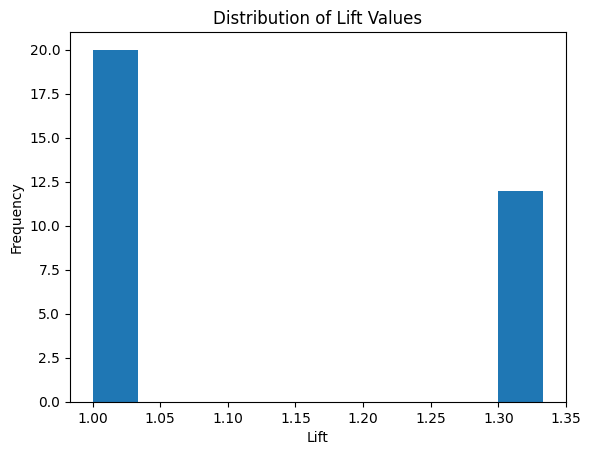

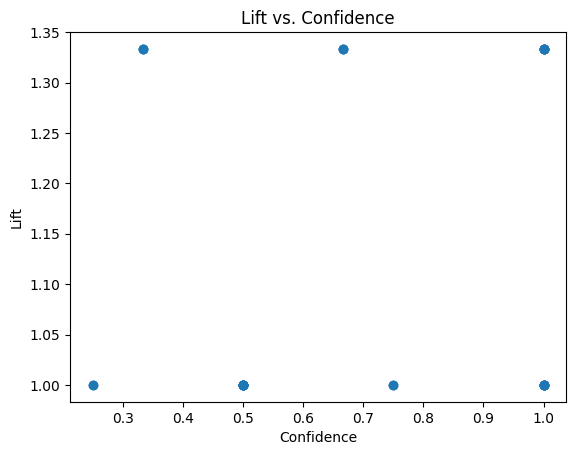

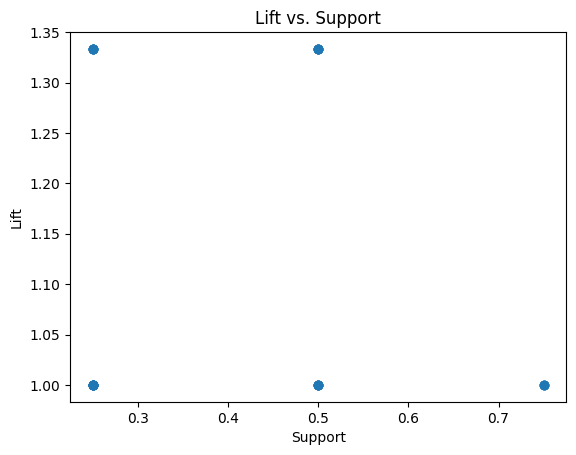


Top 10 rules based on lift:
              antecedents      consequents      lift  confidence  support
0                  (Eggs)          (Bread)  1.333333    1.000000     0.50
1                 (Bread)           (Eggs)  1.333333    0.666667     0.50
11                (Bread)  (Eggs, Diapers)  1.333333    0.333333     0.25
8         (Eggs, Diapers)          (Bread)  1.333333    1.000000     0.25
15          (Milk, Bread)           (Eggs)  1.333333    0.666667     0.50
14           (Milk, Eggs)          (Bread)  1.333333    1.000000     0.50
18                 (Eggs)    (Milk, Bread)  1.333333    1.000000     0.50
19                (Bread)     (Milk, Eggs)  1.333333    0.666667     0.50
27        (Eggs, Diapers)    (Milk, Bread)  1.333333    1.000000     0.25
22  (Milk, Eggs, Diapers)          (Bread)  1.333333    1.000000     0.25

Rules with high lift, confidence, and support:
      antecedents    consequents      lift  confidence  support
0          (Eggs)        (Bread)  1.333333   

In [46]:
# prompt: show me the interesting patterns and relation of the products and visualize histogram

# Assuming you have already calculated 'rules' as shown in the previous code

# Create a histogram of lift values
plt.hist(rules['lift'], bins=10)
plt.xlabel('Lift')
plt.ylabel('Frequency')
plt.title('Distribution of Lift Values')
plt.show()


# Analyze the relationship between lift and confidence
plt.scatter(rules['confidence'], rules['lift'])
plt.xlabel('Confidence')
plt.ylabel('Lift')
plt.title('Lift vs. Confidence')
plt.show()

# Analyze the relationship between lift and support
plt.scatter(rules['support'], rules['lift'])
plt.xlabel('Support')
plt.ylabel('Lift')
plt.title('Lift vs. Support')
plt.show()



# Find the rules with the highest lift values
top_rules = rules.sort_values('lift', ascending=False).head(10)
print("\nTop 10 rules based on lift:")
print(top_rules[['antecedents', 'consequents', 'lift', 'confidence', 'support']])


# Filter rules based on a combination of lift, support and confidence
threshold_lift = 1.2
threshold_confidence = 0.6
threshold_support = 0.3

filtered_rules = rules[(rules['lift'] > threshold_lift) &
                      (rules['confidence'] > threshold_confidence) &
                      (rules['support'] > threshold_support)]

print("\nRules with high lift, confidence, and support:")
print(filtered_rules[['antecedents', 'consequents', 'lift', 'confidence', 'support']])


              antecedents      consequents      lift  confidence
0                  (Eggs)          (Bread)  1.333333    1.000000
1                 (Bread)           (Eggs)  1.333333    0.666667
11                (Bread)  (Eggs, Diapers)  1.333333    0.333333
8         (Eggs, Diapers)          (Bread)  1.333333    1.000000
15          (Milk, Bread)           (Eggs)  1.333333    0.666667
14           (Milk, Eggs)          (Bread)  1.333333    1.000000
18                 (Eggs)    (Milk, Bread)  1.333333    1.000000
19                (Bread)     (Milk, Eggs)  1.333333    0.666667
27        (Eggs, Diapers)    (Milk, Bread)  1.333333    1.000000
22  (Milk, Eggs, Diapers)          (Bread)  1.333333    1.000000


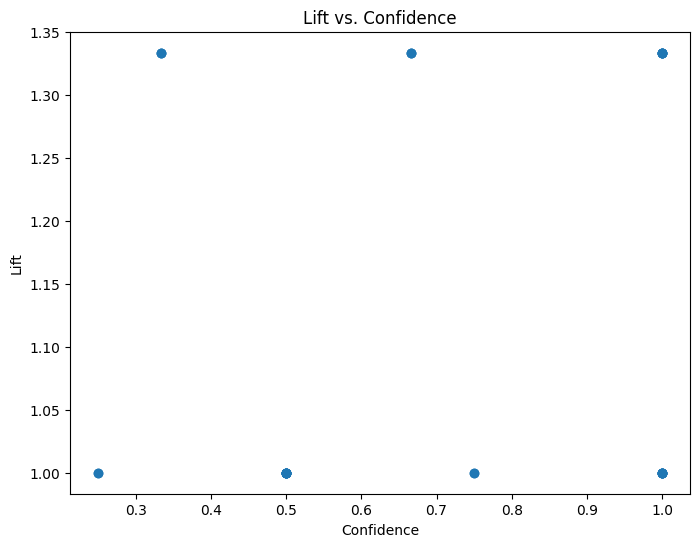


Rules with lift above threshold:
              antecedents            consequents      lift  confidence
0                  (Eggs)                (Bread)  1.333333    1.000000
1                 (Bread)                 (Eggs)  1.333333    0.666667
8         (Eggs, Diapers)                (Bread)  1.333333    1.000000
11                (Bread)        (Eggs, Diapers)  1.333333    0.333333
14           (Milk, Eggs)                (Bread)  1.333333    1.000000
15          (Milk, Bread)                 (Eggs)  1.333333    0.666667
18                 (Eggs)          (Milk, Bread)  1.333333    1.000000
19                (Bread)           (Milk, Eggs)  1.333333    0.666667
22  (Milk, Eggs, Diapers)                (Bread)  1.333333    1.000000
26          (Milk, Bread)        (Eggs, Diapers)  1.333333    0.333333
27        (Eggs, Diapers)          (Milk, Bread)  1.333333    1.000000
31                (Bread)  (Milk, Eggs, Diapers)  1.333333    0.333333


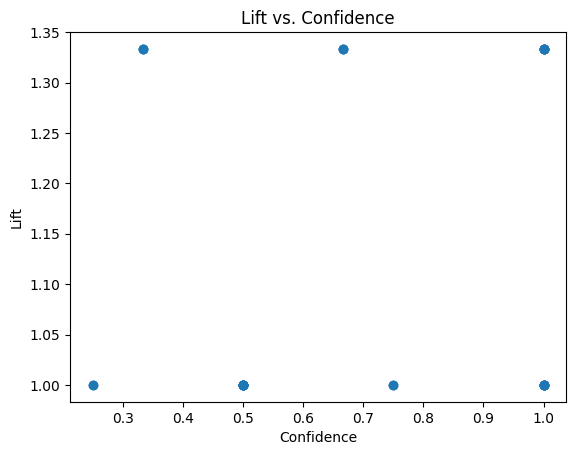

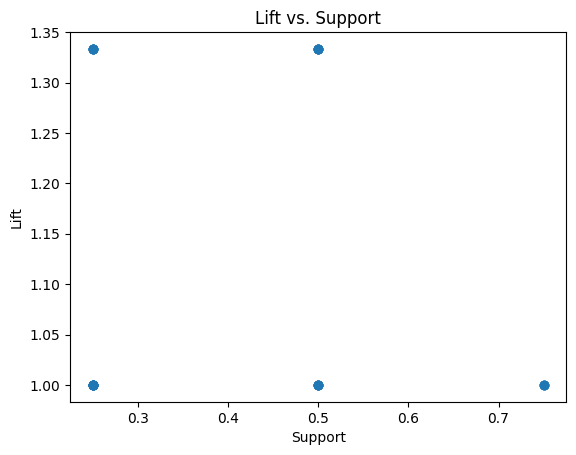


Top 10 rules based on lift:
              antecedents      consequents      lift  confidence  support
0                  (Eggs)          (Bread)  1.333333    1.000000     0.50
1                 (Bread)           (Eggs)  1.333333    0.666667     0.50
11                (Bread)  (Eggs, Diapers)  1.333333    0.333333     0.25
8         (Eggs, Diapers)          (Bread)  1.333333    1.000000     0.25
15          (Milk, Bread)           (Eggs)  1.333333    0.666667     0.50
14           (Milk, Eggs)          (Bread)  1.333333    1.000000     0.50
18                 (Eggs)    (Milk, Bread)  1.333333    1.000000     0.50
19                (Bread)     (Milk, Eggs)  1.333333    0.666667     0.50
27        (Eggs, Diapers)    (Milk, Bread)  1.333333    1.000000     0.25
22  (Milk, Eggs, Diapers)          (Bread)  1.333333    1.000000     0.25

Rules with high lift, confidence, and support:
      antecedents    consequents      lift  confidence  support
0          (Eggs)        (Bread)  1.333333   

In [64]:
# prompt: show me  customer behaviour on purchasing products by using discovered rules

# Assuming you have already calculated 'rules' as shown in the previous code

# Find the rules with the highest lift values
# You can adjust the number of top rules to display
top_rules = rules.sort_values('lift', ascending=False).head(10)

# Print the top rules with lift and confidence
print(top_rules[['antecedents', 'consequents', 'lift', 'confidence']])


# You can also visualize the lift values with a scatter plot or other suitable visualization
# For example, you can plot confidence vs. lift to see which rules have high confidence and high lift
plt.figure(figsize=(8, 6))
plt.scatter(rules['confidence'], rules['lift'])
plt.xlabel('Confidence')
plt.ylabel('Lift')
plt.title('Lift vs. Confidence')
plt.show()

# Based on your analysis of the rules, you can choose an appropriate lift threshold.
# For example, you might choose a threshold of 1.5 or higher to filter out rules
# with low lift values, which might not be very interesting or useful.

# Threshold can be chosen by a combination of lift, support and confidence
threshold_lift = 1.2
filtered_rules = rules[rules['lift'] > threshold_lift]

# Print the filtered rules
print("\nRules with lift above threshold:")
print(filtered_rules[['antecedents', 'consequents', 'lift', 'confidence']])

# Analyze the relationship between lift and confidence
plt.scatter(rules['confidence'], rules['lift'])
plt.xlabel('Confidence')
plt.ylabel('Lift')
plt.title('Lift vs. Confidence')
plt.show()

# Analyze the relationship between lift and support
plt.scatter(rules['support'], rules['lift'])
plt.xlabel('Support')
plt.ylabel('Lift')
plt.title('Lift vs. Support')
plt.show()



# Find the rules with the highest lift values
top_rules = rules.sort_values('lift', ascending=False).head(10)
print("\nTop 10 rules based on lift:")
print(top_rules[['antecedents', 'consequents', 'lift', 'confidence', 'support']])


# Filter rules based on a combination of lift, support and confidence
threshold_lift = 1.2
threshold_confidence = 0.6
threshold_support = 0.3

filtered_rules = rules[(rules['lift'] > threshold_lift) &
                      (rules['confidence'] > threshold_confidence) &
                      (rules['support'] > threshold_support)]

print("\nRules with high lift, confidence, and support:")
print(filtered_rules[['antecedents', 'consequents', 'lift', 'confidence', 'support']])
